In [41]:
import numpy as np
from matplotlib import pyplot as plt

In [47]:
# vit_model_name = "20230711_vit_noisy_6_params_no_norm"
# resnet_model_name = "20230715_resnet_noisy_6_params_no_norm"

vit_model_name = "20230725_vit_DES"
resnet_model_name = "20230728_resnet_DES"

vit_preds = np.load(f"../models/{vit_model_name}/preds0.npy")
resnet_preds = np.load(f"../models/{resnet_model_name}/preds0.npy")
vit_labels = np.load(f"../models/{vit_model_name}/label_ids0.npy")
resnet_labels = np.load(f"../models/{resnet_model_name}/label_ids0.npy")

In [48]:
preds, stds = vit_preds[:, :, :vit_preds.shape[2]//2], vit_preds[:, :, vit_preds.shape[2]//2:]
vit_preds, vit_stds = np.empty(vit_labels.shape), np.empty(vit_labels.shape)

for ind in range(vit_preds.shape[0]):
    vals = np.random.normal(preds[:, ind], np.exp(stds[:, ind]))
    vit_preds[ind] = np.mean(vals, axis=0)
    vit_stds[ind] = np.std(vals, axis=0)

In [49]:
preds, stds = resnet_preds[:, :, :resnet_preds.shape[-1]//2], resnet_preds[:, :, resnet_preds.shape[-1]//2:]
resnet_preds, resnet_stds = np.empty(resnet_labels.shape), np.empty(resnet_labels.shape)

for ind in range(resnet_preds.shape[0]):
    vals = np.random.normal(preds[:, ind], np.exp(stds[:, ind]))
    resnet_preds[ind] = np.mean(vals, axis=0)
    resnet_stds[ind] = np.std(vals, axis=0)

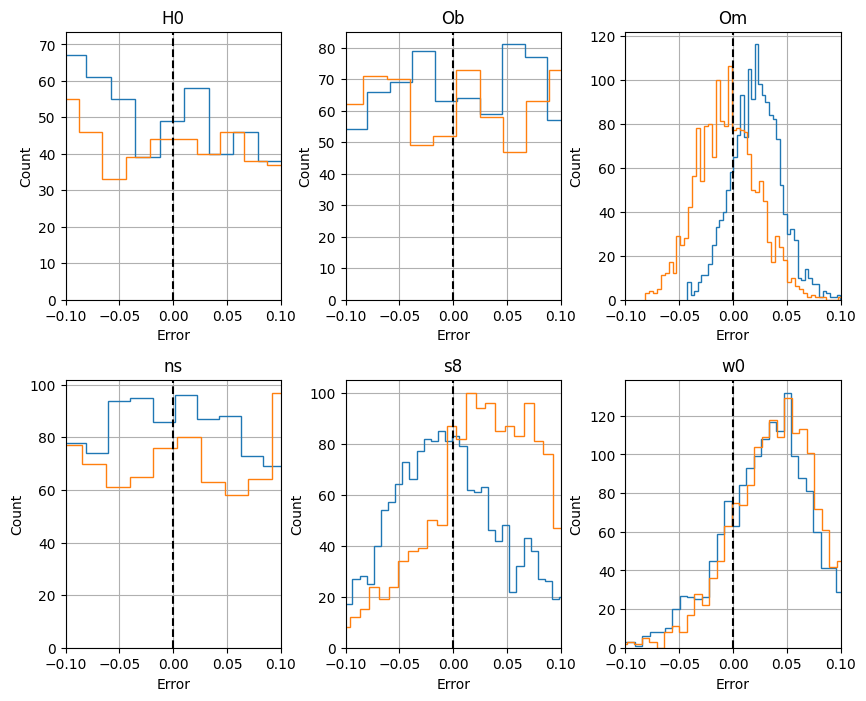

In [50]:
labels = ["H0", "Ob", "Om", "ns", "s8", "w0"]
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))
# add hspace and vspace
fig.subplots_adjust(wspace=0.3, hspace=0.3)
for i in range(6):
    axs[i//3, i%3].set_title(labels[i])
    axs[i//3, i%3].hist(vit_preds[:, i] - vit_labels[:, i], bins=50, label=labels[i], histtype='step')
    axs[i//3, i%3].hist(resnet_preds[:, i] - resnet_labels[:, i], bins=50, label=labels[i], histtype='step')
    axs[i//3, i%3].set_xlabel("Error")
    axs[i//3, i%3].set_ylabel("Count")
    axs[i//3, i%3].axvline(x=0, color='k', linestyle='--')
    axs[i//3, i%3].set_xlim(-0.1, 0.1)
    axs[i//3, i%3].grid()
plt.show()
plt.close()